<a href="https://colab.research.google.com/github/geoUFSC/learning/blob/main/Casagrande%20plasticidade_Plasticity%20chart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carta de plasticidade de Casagrande _(Casagrande's plasticity chart)_

Neste exemplo, vamos classificar o solo, segundo os limites de liquidez e plasticidade pela carta de Casagrande. \
_In this example, we will classify the soil according to the liquid and plastic limits using Casagrande’s plasticity chart._

## Pré-requisitos _(Prerequisites)_

Vamos utilizar os pacotes `numpy` para funções numéricas (ex.: `np.py` para a constante matemática $\pi$), `matplotlib` 
para visualização gráfica e `scipy` para ajuste de curva. \
_We will use the numpy package for numerical functions (e.g., `np.py` for the mathematical constant $\pi$) and `plotly`
for plotting, and `scipy` for curve fitting._


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## Cálculo do limite de liquidez, LL _(Calculation of the liquid limit, LL)_

### Exercício _(Exercise)_
Defina uma função logarítmica chamada `log_function` para transformação logarítmica do número de golpes obtido no experimento (com equipamento de Casagrande).\
_Define a logarithmic function called `log_function` to perform a logarithmic transformation of the number of blows obtained in the experiment (with the Casagrande apparatus)._

In [2]:
# Definindo a função logarítmica 
# Defining the logarithmic function
def log_function(N, a, b):
    return a * np.log(N) + b

# onde N é o número de golpes (blows) e 'a' e 'b' são os parâmetros a serem ajustados usando `curve_fit`
# where N is the number of blows and 'a' e 'b'are the parameters to be fitted using `curve_fit`

### Verificações _(Testing)_

Vamos verificar a implementação para alguns valores esperados. Caso alguma verificação falhe, volte à célula anterior e corrija a função.\
_We will verify the implementation against a few expected values. If any check fails, go back to the previous cell and fix the function._

#TODO

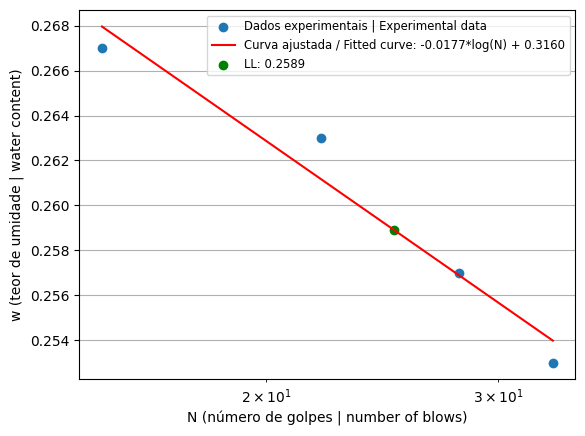

In [3]:
# Valores obtidos experimentalmente
# Experimentally obtained values
N = np.array([15, 22, 28, 33])  # Número de golpes (Number of blows)
w = np.array([0.267, 0.263, 0.257, 0.253])  # Teor de umidade (Water content)

# Parametrização da curva
# Curve parameterization
params, covariance = curve_fit(log_function, N, w)
a, b = params

# Criando um conjunto de valores N para a curva ajustada
# Creating a set of N values for the fitted curve
N_fit = np.linspace(min(N), max(N), 100)
w_fit = log_function(N_fit, a, b)

# Calculando o valor de w para N = 25 (Limite de Liquidez, LL)
# Calculating the value of w for N = 25 (Liquid Limit)
N_ll = 25
w_ll = log_function(N_ll, a, b)

# Plotar os dados fornecidos e a curva ajustada
# Plot the provided data and the fitted curve
plt.scatter(N, w, label="Dados experimentais | Experimental data")
plt.semilogx(N_fit, w_fit, 'r', label=f"Curva ajustada / Fitted curve: {a:.4f}*log(N) + {b:.4f}")
plt.scatter(N_ll, w_ll, label=f"LL: {w_ll:.4f}", color='g')
plt.xlabel("N (número de golpes | number of blows)")
plt.ylabel("w (teor de umidade | water content)")
plt.legend(fontsize='small')
plt.grid()
plt.show()

In [4]:
# Cálculo do Limite de Plasticidade (LP)
# Calculation of the Plasticity Limit (LP)
Mw = 1.0  # Massa da água obtida experimentalmente, g (Mass of water obtained experimentally)
Ms = 20.0  # Massa do solo seco obtida experimentalmente, g (Mass of dry soil obtained experimentally)
LP = (Mw / Ms) * 100  # Limite de Plasticidade, % (Plasticity Limit, %)

# Cálculo do Índice de Plasticidade (IP)
# Calculation of the Plasticity Index (IP)
LL = w_ll * 100  # Limite de Liquidez em % (Liquid Limit in %)
IP =(LL - LP)



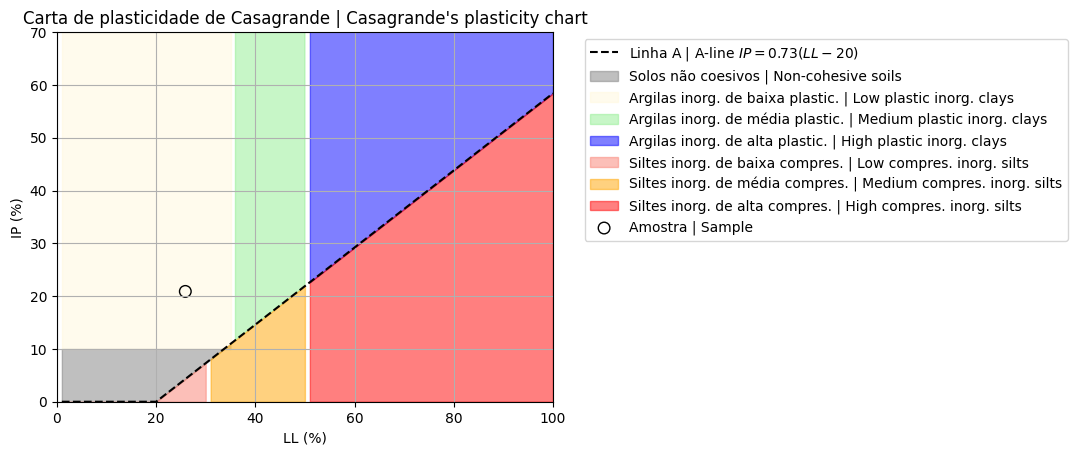

Limite de Liquidez | Liquid Limit (LL): 25.89%
Limite de Plasticidade | Plasticity Limit (PL): 5.00%
Índice de Plasticidade | Plasticity Index (IP): 20.89%


In [5]:
# Carta de plasticidade de Casagrande (Casagrande's plasticity chart)

# Definindo a linha A para o gráfico do IP vs LL
# Defining line A for the IP vs LL graph
LL_range = np.linspace(1, 100, 100) 
La = np.where(LL_range < 20, 0, 0.73 * (LL_range - 20))

# Plotagem do gráfico do Índice de Plasticidade vs Limite de Liquidez
# Plotting the Plasticity Index vs Liquid Limit graph
plt.plot(LL_range, La, label=r'Linha A | A-line $IP = 0.73(LL - 20)$', color='k', linestyle='--')

# Plotagem dos diferentes tipos de solos
# Plotting different soil types
plt.fill_between(LL_range, 0.73 * (LL_range - 20), 10, where=(LL_range >= 0) & (LL_range <= 35), color='gray', alpha=0.5, label='Solos não coesivos | Non-cohesive soils')
plt.fill_between(LL_range, 10, 100, where=(LL_range >= 0) & (LL_range <= 35), color='cornsilk', alpha=0.5, label='Argilas inorg. de baixa plastic. | Low plastic inorg. clays')
plt.fill_between(LL_range, 0.73 * (LL_range - 20), 100, where=(LL_range > 35) & (LL_range <= 50), color='lightgreen', alpha=0.5, label='Argilas inorg. de média plastic. | Medium plastic inorg. clays')
plt.fill_between(LL_range, 0.73 * (LL_range - 20), 100, where=(LL_range > 50), color='blue', alpha=0.5, label='Argilas inorg. de alta plastic. | High plastic inorg. clays')
plt.fill_between(LL_range, 0, 0.73 * (LL_range - 20), where=(LL_range > 0) & (LL_range <= 30), color='salmon', alpha=0.5, label='Siltes inorg. de baixa compres. | Low compres. inorg. silts')
plt.fill_between(LL_range, 0, 0.73 * (LL_range - 20), where=(LL_range > 30) & (LL_range <= 50), color='orange', alpha=0.5, label='Siltes inorg. de média compres. | Medium compres. inorg. silts')
plt.fill_between(LL_range, 0, 0.73 * (LL_range - 20), where=(LL_range > 50), color='red', alpha=0.5, label='Siltes inorg. de alta compres. | High compres. inorg. silts')

# Plotagem da amostra na carta LLxIP
# Plotting the sample on the chart LLxIP
plt.scatter(LL, IP, label='Amostra | Sample', facecolors='none', edgecolors='black', s=70)

plt.xlabel('LL (%)')
plt.ylabel('IP (%)')
plt.xlim(0, 100)
plt.ylim(0, 70)
plt.title("Carta de plasticidade de Casagrande | Casagrande's plasticity chart")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

# Exibindo os resultados
# Displaying the results
print(f'Limite de Liquidez | Liquid Limit (LL): {LL:.2f}%')
print(f'Limite de Plasticidade | Plasticity Limit (PL): {LP:.2f}%')
print(f'Índice de Plasticidade | Plasticity Index (IP): {IP:.2f}%')

##TO-DO:
- Deixar interativo (entradas em slider para LL, LP) _Make interactive (slider entries for LL, LP)_
- Verificações _(Testing)_

---
---
#### **PROJETO: REPOSITÓRIO PYTHON PARA GEOTECNIA _(PYTHON REPOSITORY FOR GEOTECHNICS)_**
Este repositório faz parte do projeto de extensão da **Universidade Federal de Santa Catarina** (UFSC) denominado **"Repositório Python para Geotecnia"**, cujo objetivo é desenvolver e compartilhar scripts interativos de geotecnia.\
_This repostitory is part of the extension project of the **Federal University of Santa Catarina** (UFSC) called **"Python Repository for Geotechnics"**, which aims to develop and share interactive scripts for geotechnical engineering._

##### Equipe 2024: _(Team 2024)_
- Prof. Stephanie Thiesen* (coordenadora/_coordinator_): `stephanie.thiesen@ufsc.br` 
    - Bárbara Liskoski (voluntária | _volunteer_)
    - Célio de Sousa Lopes (bolsista | _scholarship holder_)
    - Leonardo Taveira de Paula (voluntário | _volunteer_)

 *Para sugestões, entre em contato pelo e-mail \
_*For suggestions, please contact via e-mail_

**Isenção de Responsabilidade:**
Os autores deste projeto não se responsabilizam por quaisquer usos indevidos, imprecisões ou danos resultantes da aplicação dos scripts e funções contidos neste repositório. O uso dos materiais é de responsabilidade exclusiva do usuário. \
**_Disclaimer:_** _The authors of this project are not responsible for any misuse, inaccuracies, or damages resulting from the application of the scripts and functions contained in this repository. The use of the materials is the sole responsibility of the user._

---
---